In [2]:
import Pkg
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics","ApproxFun"])

   Resolving package versions...
   Installed FastTransforms_jll ───────────── v0.6.2+0
   Installed SemiseparableMatrices ────────── v0.3.5
   Installed InfiniteArrays ───────────────── v0.12.10
   Installed FastGaussQuadrature ──────────── v0.5.0
   Installed ApproxFunFourier ─────────────── v0.3.10
   Installed InfiniteLinearAlgebra ────────── v0.6.15
   Installed ApproxFunBase ────────────────── v0.7.74
   Installed ApproxFun ────────────────────── v0.13.14
   Installed LowRankApprox ────────────────── v0.5.2
   Installed BlockBandedMatrices ──────────── v0.11.10
   Installed LazyArrays ───────────────────── v0.22.16
   Installed LazyBandedMatrices ───────────── v0.8.6
   Installed MatrixFactorizations ─────────── v0.9.6
   Installed FastTransforms ───────────────── v0.14.9
   Installed LLVMOpenMP_jll ───────────────── v15.0.4+0
   Installed Infinities ───────────────────── v0.1.6
   Installed LLVMExtra_jll ────────────────── v0.0.16+2
   Installed ApproxFunSingularities ───────── 

In [8]:
using Plots, Distributions, Random, Polynomials, Statistics, ApproxFun

In [6]:
# experimental data for LD50 test
dose = [-0.86,-0.3,-0.05,0.73]
n = ones(4)*5
nd = [0,1,3,5]

4-element Vector{Int64}:
 0
 1
 3
 5

In [3]:
function invlogit(x)
    return exp(x)/(1+exp(x))
end

invlogit (generic function with 1 method)

In [4]:
function logit(p)
    return log(p/(1-p))
end

logit (generic function with 1 method)

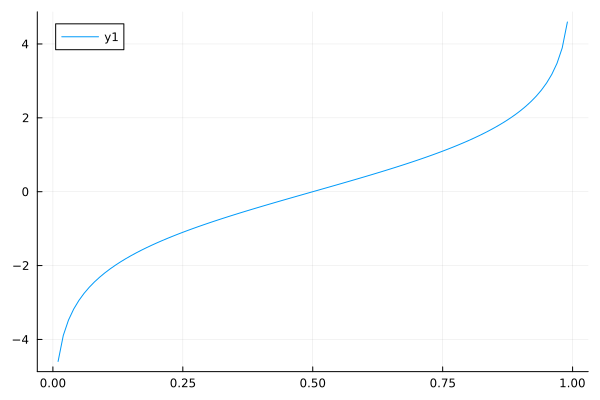

In [9]:
p_range = 0:0.01:1
plot(p_range,logit.(p_range))

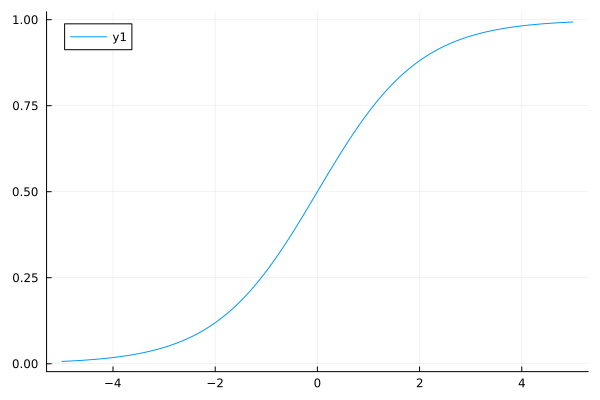

In [10]:
logit_range = -5:0.01:5
plot(logit_range,invlogit.(logit_range))

p_posterior is proportional to the posterior probability of alpha and beta given the observed data.  The model is that $logit(\theta)=\alpha+dose*\beta$, where theta is the probablity of death for the log drug concentration dose.

$$logit(p)=\log\left( \frac{p}{1-p} \right) =\log(p)-\log(1-p)=-\log\left( \frac{1}{p} - 1\right)$$

The $logit$ function is often used to stretch the value space of a variable that has a range from 0 to 1 (for example a probability).

As you can see below, for each dose the likelihood of the data to be observed $deaths_i$ given the probability of death $\theta_i$ and the number of tries $n_i$:

$$P( deaths_{i} \mid n_{i},\theta_{i}) \propto  \theta_{i}^{deaths_{i}}(1-\theta_{i})^{n_{i}-deaths_{i}}$$

The combined likelihood is the product of all experimental outcomes:

$$P( \{deaths_{i}\} \mid \{n_{i},\theta_{i}\}) \propto  \prod_{i}\theta_{i}^{deaths_{i}}(1-\theta_{i})^{n_{i}-deaths_{i}}$$

In order to use the function with alpha, beta being two-dimensional matrices and dose,obs_deaths and n being one-dimensional arrays, I was forced to interate over dose and then take the product over the first axis.  Let me know if there is an easier and more elegant way.

In [13]:
# trick how to iterate over several list together
for (item1,item2) in zip([2,5,6],[7,9,1])
    println(item1," ", item2)
end

2 7
5 9
6 1


In [15]:
collect(zip([2,5,6],[7,9,1]))

3-element Vector{Tuple{Int64, Int64}}:
 (2, 7)
 (5, 9)
 (6, 1)

In [16]:
function posterior(α,β,dose,deaths,n)
    p_list = []
    for (d,nd,nn) in zip(dose,deaths,n)
        θ = invlogit(α+β*d)
        push!(p_list,θ^nd*(1-θ)^(nn-nd))
    end
    return prod(p_list)
end

posterior (generic function with 1 method)

In [17]:
poster(α,β) = posterior(α,β,dose,nd,n)

poster (generic function with 1 method)

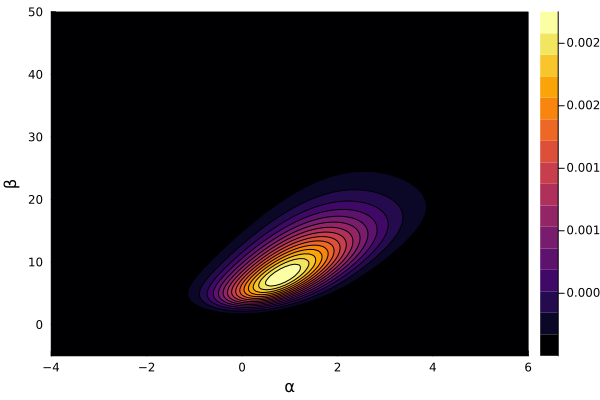

In [26]:
contourf(-4:0.1:6,-5:0.1:50,poster,xlabel="α",ylabel="β")

In [27]:
# estimate of LD50
-0.7/7

-0.09999999999999999

In [28]:
α_range = -4.0:0.1:6.0
β_range = -5.0:0.1:50.0

-5.0:0.1:50.0

In [29]:
α_grid = α_range' .* ones(length(β_range))
β_grid = ones(length(α_range))' .* β_range

551×101 Matrix{Float64}:
 -5.0  -5.0  -5.0  -5.0  -5.0  -5.0  …  -5.0  -5.0  -5.0  -5.0  -5.0  -5.0
 -4.9  -4.9  -4.9  -4.9  -4.9  -4.9     -4.9  -4.9  -4.9  -4.9  -4.9  -4.9
 -4.8  -4.8  -4.8  -4.8  -4.8  -4.8     -4.8  -4.8  -4.8  -4.8  -4.8  -4.8
 -4.7  -4.7  -4.7  -4.7  -4.7  -4.7     -4.7  -4.7  -4.7  -4.7  -4.7  -4.7
 -4.6  -4.6  -4.6  -4.6  -4.6  -4.6     -4.6  -4.6  -4.6  -4.6  -4.6  -4.6
 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  …  -4.5  -4.5  -4.5  -4.5  -4.5  -4.5
 -4.4  -4.4  -4.4  -4.4  -4.4  -4.4     -4.4  -4.4  -4.4  -4.4  -4.4  -4.4
 -4.3  -4.3  -4.3  -4.3  -4.3  -4.3     -4.3  -4.3  -4.3  -4.3  -4.3  -4.3
 -4.2  -4.2  -4.2  -4.2  -4.2  -4.2     -4.2  -4.2  -4.2  -4.2  -4.2  -4.2
 -4.1  -4.1  -4.1  -4.1  -4.1  -4.1     -4.1  -4.1  -4.1  -4.1  -4.1  -4.1
 -4.0  -4.0  -4.0  -4.0  -4.0  -4.0  …  -4.0  -4.0  -4.0  -4.0  -4.0  -4.0
 -3.9  -3.9  -3.9  -3.9  -3.9  -3.9     -3.9  -3.9  -3.9  -3.9  -3.9  -3.9
 -3.8  -3.8  -3.8  -3.8  -3.8  -3.8     -3.8  -3.8  -3.8  -3.8  -3.8  -3.8


In [30]:
α_grid

551×101 Matrix{Float64}:
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5  …  5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5  …  5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5  …  5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
 -4.0  -3.9  -3.8  -3.7  -3.6  -3.5     5.4  5.5  5.6  5.7  5.8  5.9  6.0
  ⋮          

In [31]:
p_grid = poster.(α_grid,β_grid)

551×101 Matrix{Float64}:
 2.18103e-25  3.79789e-25  6.50135e-25  …  2.69409e-41  9.39841e-42
 3.87243e-25  6.822e-25    1.18136e-24     4.8772e-41   1.69647e-41
 6.8108e-25   1.21398e-24  2.12691e-24     8.81023e-41  3.05612e-41
 1.18652e-24  2.13993e-24  3.79353e-24     1.58824e-40  5.49513e-41
 2.04743e-24  3.73634e-24  6.70228e-24     2.85766e-40  9.86322e-41
 3.49942e-24  6.46157e-24  1.17288e-23  …  5.13238e-40  1.76742e-40
 5.92458e-24  1.10682e-23  2.03294e-23     9.20215e-40  3.16215e-40
 9.9363e-24   1.87791e-23  3.49003e-23     1.64728e-39  5.64927e-40
 1.65099e-23  3.1562e-23   5.93447e-23     2.94439e-39  1.00788e-39
 2.71815e-23  5.25518e-23  9.99563e-23     5.25549e-39  1.79582e-39
 4.43491e-23  8.66969e-23  1.66784e-22  …  9.36828e-39  3.19594e-39
 7.1724e-23   1.41736e-22  2.75723e-22     1.6679e-38   5.68125e-39
 1.15002e-22  2.29669e-22  4.5168e-22      2.96606e-38  1.00886e-38
 ⋮                                      ⋱               ⋮
 3.09879e-17  4.61899e-17  6.8843

In [32]:
β_marg = vec(mean(p_grid,dims=2))
α_marg = vec(mean(p_grid,dims=1))

101-element Vector{Float64}:
 1.3366743373506462e-10
 2.1050011125962182e-10
 3.312052439798948e-10
 5.206135452261118e-10
 8.174423460853168e-10
 1.2819363080137e-9
 2.00761865933416e-9
 3.1392950850699506e-9
 4.900517976241521e-9
 7.635277535573939e-9
 1.1870939998411704e-8
 1.841266710967115e-8
 2.8484059135483996e-8
 ⋮
 7.823475078320792e-6
 6.6912129926761755e-6
 5.718060603242668e-6
 4.882668870760424e-6
 4.1663372052668895e-6
 3.5527319088375708e-6
 3.0276239167153087e-6
 2.578647205073345e-6
 2.195078306897291e-6
 1.8676366929188612e-6
 1.5883052865300504e-6
 1.3501700503952383e-6

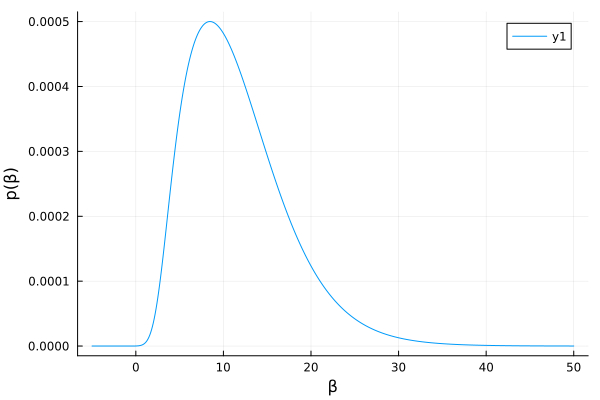

In [34]:
plot(β_range,β_marg,xlabel="β",ylabel="p(β)")

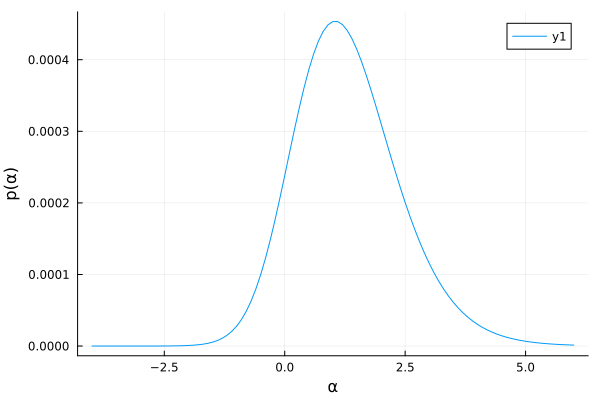

In [35]:
plot(α_range,α_marg,xlabel="α",ylabel="p(α)")

In [36]:
function α_avg(β)
    p = poster.(α_range,β)
    return mean(p)
end

α_avg (generic function with 1 method)

In [37]:
function β_avg(α)
    p = poster.(α,β_range)
    return mean(p)
end

β_avg (generic function with 1 method)

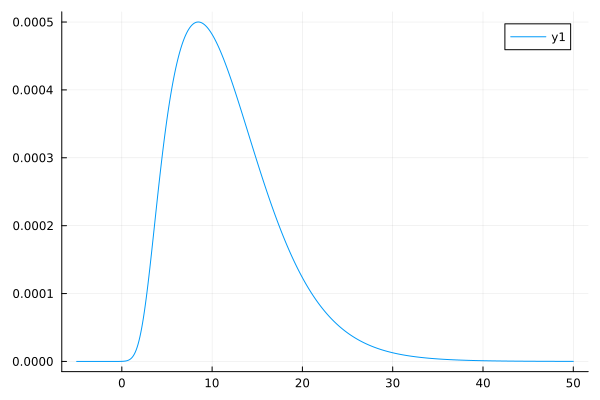

In [38]:
plot(β_range,α_avg.(β_range))

In [39]:
# see https://juliaapproximation.github.io/ApproxFun.jl/stable/
# for more information about ApproxFun
p_β = Fun(α_avg,-5..50)

Fun(Chebyshev(-5..50), [8.46805e-5, -6.97663e-5, -9.70986e-5, 0.000132525, -3.07062e-5, -6.75956e-5, 7.4624e-5, -2.06208e-5, -2.61729e-5, 3.54151e-5  …  6.5964e-20, -1.24697e-22, -5.29561e-20, 6.29392e-20, -4.2099e-20, 1.63306e-20, 3.46465e-21, -2.21335e-20, 2.73114e-20, -1.69005e-20])

In [41]:
β_sample = ApproxFun.sample(p_β,1000)

1000-element Vector{Float64}:
 11.505067497241246
  8.684594113788275
 13.830274391607507
 13.887945440378946
  6.640838583902191
 28.140893744407673
 11.941838448552655
 13.738019766053196
 11.024678188173755
  7.2226203733003835
 11.550679743327539
 13.668944860389285
 40.76838373449674
  ⋮
 11.432018384322244
 16.746023964397185
  8.186228575121728
 11.117663705619751
  9.641153903935784
  9.748020768758483
  9.18991249789224
  8.322736951207421
 10.800943858738794
 20.00521369740989
 21.0149606221197
 11.039676998734489

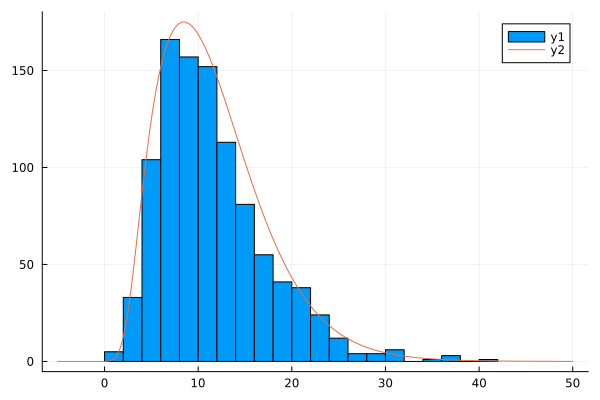

In [49]:
histogram(β_sample,bins=30)
plot!(β_range,350000*α_avg.(β_range))

In [50]:
α_sample = []
for β_i in β_sample
    α_sampler = Fun(x->poster(x,β_i),-4..6)
    push!(α_sample,ApproxFun.sample(α_sampler,1)[1])
end

In [51]:
α_sample

1000-element Vector{Any}:
 1.3753777586965512
 1.0074701163077506
 1.1499274230003422
 0.25934016265312465
 0.9492163531909839
 2.741456863606139
 2.4424750984661117
 2.32206640976559
 2.2166641691222324
 0.5311211881727687
 0.7606005801717899
 3.3811913353680225
 2.651916350671705
 ⋮
 1.0072043835561075
 1.4144089049147581
 2.0821218962105306
 2.3729079362418517
 0.8098872253143199
 1.0987354036245236
 1.3234698594524232
 1.7136510747484337
 1.8696942173625999
 2.879956256077584
 3.7079273729219366
 0.8919650154639882

In [52]:
β_sample

1000-element Vector{Float64}:
 11.505067497241246
  8.684594113788275
 13.830274391607507
 13.887945440378946
  6.640838583902191
 28.140893744407673
 11.941838448552655
 13.738019766053196
 11.024678188173755
  7.2226203733003835
 11.550679743327539
 13.668944860389285
 40.76838373449674
  ⋮
 11.432018384322244
 16.746023964397185
  8.186228575121728
 11.117663705619751
  9.641153903935784
  9.748020768758483
  9.18991249789224
  8.322736951207421
 10.800943858738794
 20.00521369740989
 21.0149606221197
 11.039676998734489

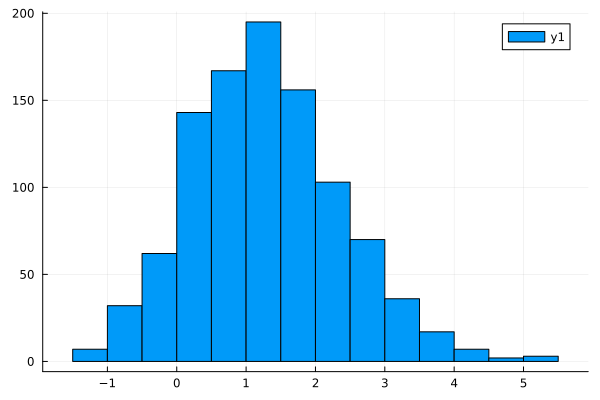

In [53]:
histogram(α_sample)

In [54]:
ld50_sample = -α_sample ./ β_sample

1000-element Vector{Float64}:
 -0.11954538806715802
 -0.11600658627306713
 -0.08314566945238207
 -0.01867376018767311
 -0.1429362182498975
 -0.09741896929449648
 -0.20453091113137092
 -0.1690248266714132
 -0.2010638434326421
 -0.07353580289726239
 -0.065848988723903
 -0.24736300935460265
 -0.06504835629350077
  ⋮
 -0.08810381069167782
 -0.08446237195897105
 -0.25434446120136217
 -0.21343584399322993
 -0.08400314250597136
 -0.1127136912906331
 -0.1440133254539658
 -0.20589994430856376
 -0.17310470657153482
 -0.14396028453574866
 -0.17644227079916994
 -0.08079629644655698

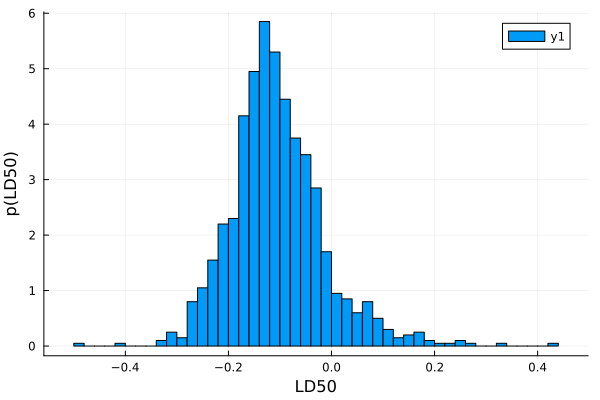

In [59]:
histogram(ld50_sample, normalize=true, xlabel="LD50",ylabel="p(LD50)")

In [56]:
mean(ld50_sample)

-0.10503719923686233

In [57]:
std(ld50_sample)

0.09173746486411807